# Matplotlib


In [118]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import linecache

matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

# Gráficas 1D

In [3]:
x = np.linspace(-10,10,500)
y = np.sin(x)

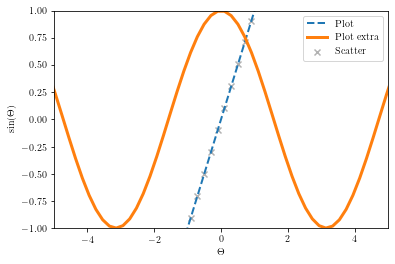

In [106]:
#plt.figure(figsize=(18,10),dpi=300)
fig, ax = plt.subplots(1,1)
plt.plot(x,y,'--',linewidth=2,label='Plot')
plt.scatter(x,y,alpha=0.3,c='black',marker='x',label='Scatter')
plt.plot(x,np.cos(x),linewidth=3,label='Plot extra')
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)
ax.set_xlabel("$\Theta$")
ax.set_ylabel("$\sin(\Theta)$")
plt.xscale("linear")
plt.yscale("linear")
ax.legend()

plt.savefig("fig1.png",dpi=300,bbox_inches="tight")

# Gráficas 2D

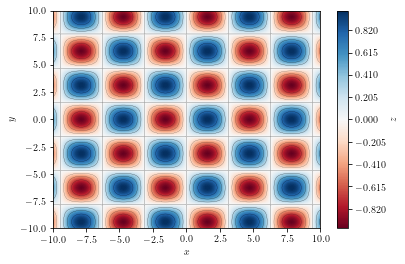

In [111]:
# contour y contourf

x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)

X,Y = np.meshgrid(x,y) # Muy importante

Z = np.sin(X)*np.cos(Y)

fig, ax = plt.subplots(1,1)

colormap = plt.get_cmap('RdBu')

cb = ax.contour(X,Y,Z,colors='k',linewidths=0.2)
cb = ax.contourf(X,Y,Z,levels=400,cmap=colormap)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
cbar = fig.colorbar(cb)
cbar.set_label("$z$")

plt.savefig("fig2.png",dpi=300,bbox_inches="tight")

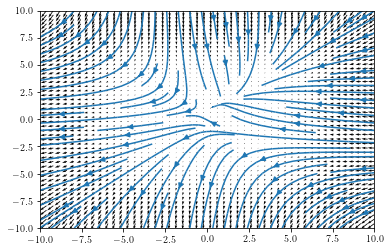

In [117]:
# streamplot y quiver

x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)

X,Y = np.meshgrid(x,y) # Muy importante

U = -1 - X**2 + Y
V = 1 + X - Y**2

fig, ax = plt.subplots(1,1)

colormap = plt.get_cmap('RdBu')

plt.streamplot(X,Y,U,V)
plt.quiver(X,Y,U,V,units="width")

plt.savefig("fig2.png",dpi=300,bbox_inches="tight")

# Obtener datos de archivo

In [136]:
time  = float(linecache.getline("matplotlib_file.dat",2))
Nx    = int(linecache.getline("matplotlib_file.dat",3))
Ny    = int(linecache.getline("matplotlib_file.dat",4))
COORD = str(linecache.getline("matplotlib_file.dat",5).rstrip("\n"))

# Leemos el archivo
#x, y, dens, pre, vx, vy = np.loadtxt("kh_100.dat",skiprows=6,unpack=True)
U = np.loadtxt("kh_100.dat",skiprows=6,unpack=True)

x = U[0].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
x = x.T # La transpone

y = U[1].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
y = y.T # La transpone

rho = U[2].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
rho = rho.T # La transpone

pre = U[3].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
pre = pre.T # La transpone

vx = U[4].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
vx = vx.T # La transpone

vy = U[5].reshape(Nx,Ny) # Construye la matriz a partir del vector U[0]
vy = vy.T # La transpone

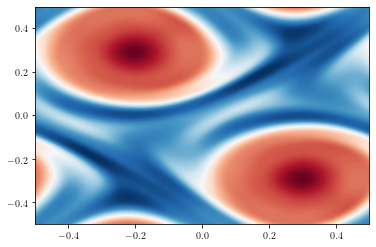

In [137]:
fig, ax = plt.subplots(1,1)

colormap = plt.get_cmap('RdBu')

cb = ax.contourf(x,y,rho,levels=400,cmap=colormap)

ax.